In [3]:
berat_badan = 55
tinggi = 155
usia = 22
jenis_kelamin = 'pria'
aktivitas = 'sedang'
filter = 4

In [4]:
def hitung_akg_diabetes(berat_badan, tinggi, usia, jenis_kelamin):
    tinggi_m = tinggi / 100
    imt = berat_badan / (tinggi_m ** 2)
    
    bbi = (tinggi - 100) - 0.1 * (tinggi - 100)
    
    if jenis_kelamin.lower() == 'pria':
        kalori_basal = bbi * 30
    elif jenis_kelamin.lower() == 'wanita':
        kalori_basal = bbi * 25

    if 60 <= usia <= 69:
        kalori_basal -= 0.1 * kalori_basal
    elif 40 <= usia <= 59:
        kalori_basal -= 0.05 * kalori_basal
    elif usia >= 70:
        kalori_basal -= 0.2 * kalori_basal
    
    if aktivitas.lower() == 'ringan':
        kalori_basal += kalori_basal * 0.15
    elif aktivitas.lower() == 'sedang':
        kalori_basal += kalori_basal * 0.25
    elif aktivitas.lower() == 'berat':
        kalori_basal += kalori_basal * 0.45
    
    protein_kalori = 0.2 * kalori_basal
    lemak_kalori = 0.25 * kalori_basal
    karbohidrat_kalori = 0.5 * kalori_basal
    
    protein_gram = protein_kalori / 4
    lemak_gram = lemak_kalori / 9
    karbohidrat_gram = karbohidrat_kalori / 4
    
    return {
        "imt": imt,
        "bbi": bbi,
        "kalori_basal": kalori_basal,
        "protein_gram": protein_gram,
        "lemak_gram": lemak_gram,
        "karbohidrat_gram": karbohidrat_gram
    }

In [5]:
kebutuhan_gizi = hitung_akg_diabetes(berat_badan, tinggi, usia, jenis_kelamin)
kebutuhan_gizi

{'imt': 22.892819979188342,
 'bbi': 49.5,
 'kalori_basal': 1856.25,
 'protein_gram': 92.8125,
 'lemak_gram': 51.5625,
 'karbohidrat_gram': 232.03125}

In [6]:
import pandas as pd

df = pd.read_csv('fix_dataset.csv')
df.head()

,No,ID,Nama,Kalori,Karbohidrat,Protein,Lemak,Jenis,Rating
0,1,NaN,Abon,560.0,0.0,18.4,56.8,Daging,3.49
1,2,NaN,Abon Ayam Gloria,220.0,20.0,14.0,10.0,Daging,2.71
2,3,NaN,Abon Haruwan,1026.0,42.6,47.4,74.0,Ikan dan Makanan Laut,4.20
3,4,NaN,Abon Ikan,870.0,72.2,54.4,40.4,Ikan dan Makanan Laut,4.09
4,5,NaN,Abon Sapi,424.0,118.6,36.0,21.2,Daging,2.12


In [7]:
df = df.drop(['ID', 'No'], axis=1)

In [8]:
df

,Nama,Kalori,Karbohidrat,Protein,Lemak,Jenis,Rating
0,Abon,560.0,0.0,18.4,56.8,Daging,3.49
1,Abon Ayam Gloria,220.0,20.0,14.0,10.0,Daging,2.71
2,Abon Haruwan,1026.0,42.6,47.4,74.0,Ikan dan Makanan Laut,4.20
3,Abon Ikan,870.0,72.2,54.4,40.4,Ikan dan Makanan Laut,4.09
4,Abon Sapi,424.0,118.6,36.0,21.2,Daging,2.12
...,...,...,...,...,...,...,...
517,Ubi Jalar Tinta/ Kemayung Kukus,330.0,79.6,1.8,0.4,Umbi Berpati,3.02
518,Wortel Kukus,74.0,16.6,2.0,1.2,Sayuran,3.32
519,Wortel Rebus,56.0,12.6,1.4,1.0,Sayuran,2.56
520,Yangko,508.0,116.2,6.0,2.2,Serealia,4.48


In [9]:
df.isna().sum()

Nama           0
Kalori         0
Karbohidrat    0
Protein        0
Lemak          0
Jenis          0
Rating         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama         522 non-null    object 
 1   Kalori       522 non-null    float64
 2   Karbohidrat  522 non-null    float64
 3   Protein      522 non-null    float64
 4   Lemak        522 non-null    float64
 5   Jenis        522 non-null    object 
 6   Rating       522 non-null    float64
dtypes: float64(5), object(2)
memory usage: 28.7+ KB


In [11]:
import tensorflow as tf
from tensorflow.keras import layers

2024-06-20 19:41:44.391394: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 19:41:44.392515: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 19:41:44.446160: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 19:41:44.656328: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 19:41:45.694008: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [18]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(df[["Jenis"]])

df["Jenis"] = enc.fit_transform(df[["Jenis"]])


In [70]:
df.head()

,Nama,Kalori,Karbohidrat,Protein,Lemak,Jenis,Rating,Cluster
0,Abon,560.0,0.0,18.4,56.8,1.0,3.49,3
1,Abon Ayam Gloria,220.0,20.0,14.0,10.0,1.0,2.71,3
2,Abon Haruwan,1026.0,42.6,47.4,74.0,2.0,4.20,3
3,Abon Ikan,870.0,72.2,54.4,40.4,2.0,4.09,3
4,Abon Sapi,424.0,118.6,36.0,21.2,1.0,2.12,3


In [71]:
df.shape

(522, 8)

In [21]:
layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(df[["Kalori", "Karbohidrat", "Protein", "Lemak", "Jenis", "Rating"]].values)

In [22]:
layer(df[["Kalori", "Karbohidrat", "Protein", "Lemak", "Jenis", "Rating"]].values)

<tf.Tensor: shape=(522, 6), dtype=float32, numpy=
array([[ 2.4700844 , -0.42846286, -0.3332249 , -0.13446738, -0.42328689,
        -0.41039872],
       [ 0.71025205, -0.32494333, -0.3559992 , -0.37670308, -0.42328689,
        -0.41443598],
       [ 4.8820896 , -0.20796625, -0.18312155, -0.04544057, -0.4181109 ,
        -0.40672377],
       ...,
       [-0.13860816, -0.36324558, -0.4212165 , -0.42328689, -0.38705504,
        -0.41521236],
       [ 2.2009335 ,  0.17298564, -0.397407  , -0.41707572, -0.38187906,
        -0.40527448],
       [ 0.10983874, -0.38705504, -0.3943014 , -0.40258297, -0.37670308,
        -0.40656847]], dtype=float32)>

In [86]:
class NNClustering:
    def __init__(self, n_clusters, input_dim, learning_rate=0.01, epochs=100):
        self.n_clusters = n_clusters
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.model = self.build_model()
    
    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(self.input_dim,)),
            tf.keras.layers.Normalization(axis=None),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(self.n_clusters, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(self.learning_rate), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
        return model
    
    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, verbose=2)
    
    def predict(self, X):
        return np.argmax(self.model.predict(X, verbose=0), axis=1)

In [87]:
import numpy as np
import random

In [88]:
n_clusters = 20
random_labels = np.random.randint(0, n_clusters, df.shape[0])

In [89]:
X = df[["Kalori", "Karbohidrat", "Protein", "Lemak", "Jenis"]].values
y = df['Rating'].values

In [90]:
n_clusters = 20
nn_clustering = NNClustering(n_clusters=n_clusters, input_dim=X.shape[1])
nn_clustering.fit(X, random_labels)
cluster_labels = nn_clustering.predict(X)
df['Cluster'] = cluster_labels

Epoch 1/1000


/home/ne3ie/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


17/17 - 1s - 30ms/step - accuracy: 0.0517 - loss: 66.0741
Epoch 2/1000
17/17 - 0s - 2ms/step - accuracy: 0.0364 - loss: 43.6402
Epoch 3/1000
17/17 - 0s - 2ms/step - accuracy: 0.0651 - loss: 15.6946
Epoch 4/1000
17/17 - 0s - 2ms/step - accuracy: 0.0575 - loss: 6.8189
Epoch 5/1000
17/17 - 0s - 2ms/step - accuracy: 0.0747 - loss: 5.7153
Epoch 6/1000
17/17 - 0s - 2ms/step - accuracy: 0.0728 - loss: 4.4727
Epoch 7/1000
17/17 - 0s - 2ms/step - accuracy: 0.0670 - loss: 4.8892
Epoch 8/1000
17/17 - 0s - 2ms/step - accuracy: 0.0766 - loss: 4.2444
Epoch 9/1000
17/17 - 0s - 2ms/step - accuracy: 0.0690 - loss: 4.2373
Epoch 10/1000
17/17 - 0s - 2ms/step - accuracy: 0.0536 - loss: 4.1414
Epoch 11/1000
17/17 - 0s - 2ms/step - accuracy: 0.0632 - loss: 4.1798
Epoch 12/1000
17/17 - 0s - 2ms/step - accuracy: 0.0747 - loss: 4.5432
Epoch 13/1000
17/17 - 0s - 2ms/step - accuracy: 0.0766 - loss: 4.2824
Epoch 14/1000
17/17 - 0s - 2ms/step - accuracy: 0.0613 - loss: 4.1113
Epoch 15/1000
17/17 - 0s - 2ms/step - 

In [107]:
cluster_labels = nn_clustering.predict(X)
cluster_labels

array([16, 16, 16, 16, 16, 16, 11, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  3, 15,  7, 17, 16,
        0, 16,  0, 16, 16, 16, 16, 16, 16, 16, 16,  4, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  3, 16, 16, 16,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16,  4, 16,  0, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16,  9, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  7,
        1, 16, 16, 16, 11, 16, 16, 16,  6, 16, 16, 16, 11, 16, 16, 16, 16,
       16, 16, 16, 16, 16

In [91]:
df

,Nama,Kalori,Karbohidrat,Protein,Lemak,Jenis,Rating,Cluster
0,Abon,560.0,0.0,18.4,56.8,1.0,3.49,16
1,Abon Ayam Gloria,220.0,20.0,14.0,10.0,1.0,2.71,16
2,Abon Haruwan,1026.0,42.6,47.4,74.0,2.0,4.20,16
3,Abon Ikan,870.0,72.2,54.4,40.4,2.0,4.09,16
4,Abon Sapi,424.0,118.6,36.0,21.2,1.0,2.12,16
...,...,...,...,...,...,...,...,...
517,Ubi Jalar Tinta/ Kemayung Kukus,330.0,79.6,1.8,0.4,12.0,3.02,16
518,Wortel Kukus,74.0,16.6,2.0,1.2,8.0,3.32,4
519,Wortel Rebus,56.0,12.6,1.4,1.0,8.0,2.56,9
520,Yangko,508.0,116.2,6.0,2.2,9.0,4.48,16


In [92]:
def calculate_nutrition_distance(features, target_features):
    return np.sqrt(np.sum((features - target_features) ** 2))

In [93]:
def fitness_function(combination, target_features, valid_X, cluster_labels, ratings):
    combined_features = np.sum(valid_X[list(combination)], axis=0)
    distance = calculate_nutrition_distance(combined_features, target_features)
    diversity_score = len(set(cluster_labels[list(combination)])) 
    average_rating = np.mean(ratings[list(combination)])  
    return diversity_score * average_rating / (distance + 1e-6)

In [94]:
def recommend_meals_ga(target_features, valid_X, cluster_labels, ratings, population_size=100, num_generations=100):
    num_meals = len(valid_X)
    sorted_indices = np.argsort(ratings)[::-1]
    sorted_valid_X = valid_X[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]
    sorted_ratings = ratings[sorted_indices]

    population = [random.sample(range(num_meals), 3) for _ in range(population_size)]

    for generation in range(num_generations):
        fitness_scores = [fitness_function(individual, target_features, sorted_valid_X, sorted_cluster_labels, sorted_ratings) for individual in population]

        best_individual = population[np.argmax(fitness_scores)]
        best_fitness = max(fitness_scores)

        if best_fitness > 0.99:
            break

        new_population = []
        for _ in range(population_size):
            if random.random() < 0.2:
                new_individual = list(random.sample(range(num_meals), 3))
            else:
                parent1, parent2 = random.sample(population, 2)
                crossover_point = random.randint(0, 2)
                new_individual = parent1[:crossover_point] + parent2[crossover_point:]
            new_population.append(new_individual)
        population = new_population

    best_combination = best_individual
    recommended_meals = sorted_valid_X[list(best_combination)]
    recommended_ratings = sorted_ratings[list(best_combination)]
    return best_combination, recommended_meals, recommended_ratings

In [95]:
target_features = np.array([kebutuhan_gizi["kalori_basal"], kebutuhan_gizi["karbohidrat_gram"], kebutuhan_gizi["protein_gram"], kebutuhan_gizi["lemak_gram"]])

In [96]:
valid_indices = np.where(np.any(X != 0, axis=1))[0]
valid_data = df.iloc[valid_indices]
valid_X = valid_data[['Kalori', 'Karbohidrat', 'Protein', 'Lemak']].values
ratings = valid_data['Rating'].values
cluster_labels = valid_data['Cluster'].values

In [97]:
best_combination, recommended_meals, recommended_ratings = recommend_meals_ga(target_features, valid_X, cluster_labels, ratings)


In [98]:
kalori_basal = np.sum(recommended_meals[:, 0])
total_karbohidrat = np.sum(recommended_meals[:, 1])
total_protein = np.sum(recommended_meals[:, 2])
total_lemak = np.sum(recommended_meals[:, 3])

In [105]:
print("Total Kalori:", round(kebutuhan_gizi["kalori_basal"], 2), "kalori per hari")
print("Kebutuhan Karbohidrat:", round(kebutuhan_gizi["karbohidrat_gram"], 2), "gram per hari")
print("Kebutuhan Protein:", round(kebutuhan_gizi["protein_gram"], 2), "gram per hari")
print("Kebutuhan Lemak:", round(kebutuhan_gizi["lemak_gram"], 2), "gram per hari \n")
print("Rekomendasi makanan dan kandungan gizinya:")

for idx in best_combination:
    meal = valid_data.iloc[idx]
    print(f"{meal['Nama']} - Kalori: {round(meal['Kalori'], 2)}, Karbohidrat: {round(meal['Karbohidrat'], 2)}, Protein: {round(meal['Protein'], 2)}, Lemak: {round(meal['Lemak'], 2)}, Rating: {round(meal['Rating'], 2)}")

print("\nTotal Kalori dari makanan yang direkomendasikan:", round(kalori_basal, 2))
print("Total Karbohidrat dari makanan yang direkomendasikan:", round(total_karbohidrat, 2))
print("Total Protein dari makanan yang direkomendasikan:", round(total_protein, 2))
print("Total Lemak dari makanan yang direkomendasikan:", round(total_lemak, 2))

Total Kalori: 1856.25 kalori per hari
Kebutuhan Karbohidrat: 232.03 gram per hari
Kebutuhan Protein: 92.81 gram per hari
Kebutuhan Lemak: 51.56 gram per hari 

Rekomendasi makanan dan kandungan gizinya:
Gado-Gado - Kalori: 274.0, Karbohidrat: 42.0, Protein: 12.2, Lemak: 6.4, Rating: 4.53
Sayur Umbut Rotan - Kalori: 114.0, Karbohidrat: 6.2, Protein: 10.8, Lemak: 5.2, Rating: 2.93
Ubi Jalar Tinta/ Kemayung Kukus - Kalori: 330.0, Karbohidrat: 79.6, Protein: 1.8, Lemak: 0.4, Rating: 3.02

Total Kalori dari makanan yang direkomendasikan: 1894.0
Total Karbohidrat dari makanan yang direkomendasikan: 259.0
Total Protein dari makanan yang direkomendasikan: 32.8
Total Lemak dari makanan yang direkomendasikan: 84.4


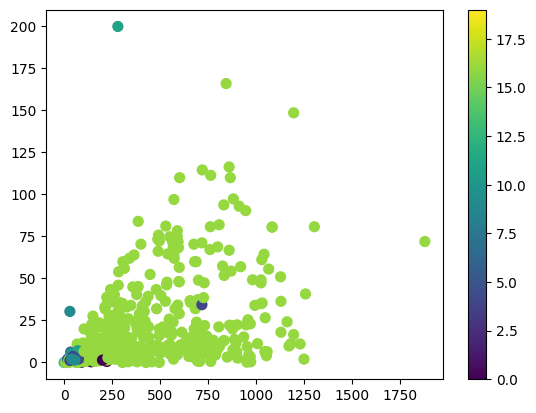

In [101]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df["Kalori"], df["Protein"], c=df["Cluster"], s=50)
plt.colorbar(scatter)